# Data Mining Principles

Name: Troy Zhongyi Zhang  
NetId: zhongyiz@uchicago.edu   
Date: 04/18/2019

# Homework 1

-------------

# Pre-processing

In [1]:
% matplotlib inline

# Standard imports
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.preprocessing import Normalizer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

In [2]:
fishes=pd.read_csv("fish.csv", header=None, index_col=False, skiprows=1, 
                   usecols=range(1,7))


In [3]:
list_species=['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike']

In [4]:
species = pd.Series(list_species)
species=species.values

In [5]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [6]:
samples = fishes.values

------------------------------------------------------------

# Question -1.1 (20 Points)

In [22]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels

labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'Species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['Species'])

# Display ct
print(ct)




Species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0    17      0      0
3            0     0      0     13


--------------------

# Question -1.2 (50 Points)

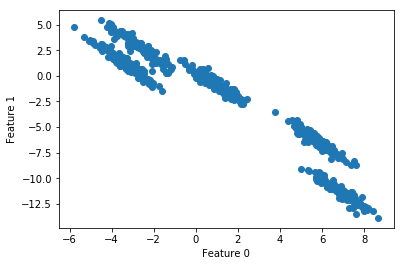

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

1. Apply both k-means and DBSCAN for the randomly generated cluster data above.
2. Plot the results for both algorithms by highlighting clusters in different colors.
3. Interpret your results. If you observe a difference in the output of two algorithms, write up a paragraph contining your examination as why one algorithm performed better than the other.


## Part 1 & 2：

## K-MEANS for X

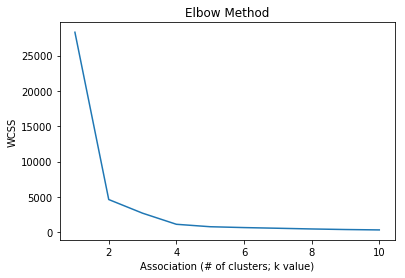

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association (# of clusters; k value)')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


According to my observation on Elbow Method graph, the optimal marginal point locates at k (Association) = 4. After k=4, the eigen-value (y-axis, also the WCSS) decreases relaxatively.    
I would choose k = 4, which means I will cluster these points into 4 clusters. 

In [10]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

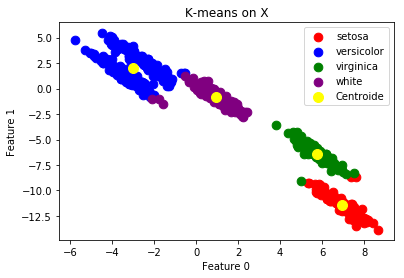

In [11]:
#Visualising the clusters with k = 4:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'virginica')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 75, 
            c = 'purple', label = 'white')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')
plt.title("K-means on X")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()

According to the visualization by my eyes, I found there were approximate 5 groups of points.  
I want to see how the clustering graph looks if I choose to have k = 5, which means I will have 5 clusters.

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

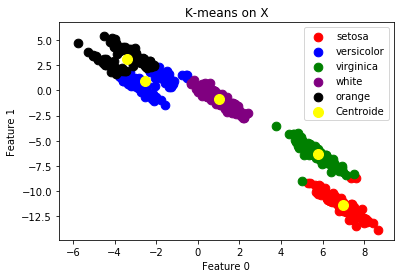

In [13]:
#Visualising the clusters with k = 5:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'virginica')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 75, 
            c = 'purple', label = 'white')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 75, 
            c = 'black', label = 'orange')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')
plt.title("K-means on X")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()

Conclusion: The computer clusters these points differently from what I assume the cluster should be by my eyes.

## DBSCAN for X

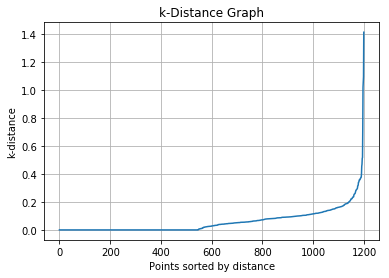

In [14]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,
                                                      axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm
m, m2= k_distances2(X, 2)
plt.plot(m2)
plt.grid(True)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
x = scaler.fit_transform(X, y=None)
dbsc = DBSCAN(eps = 0.1, min_samples = 5).fit(x)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

Text(0,0.5,'Feature 1')

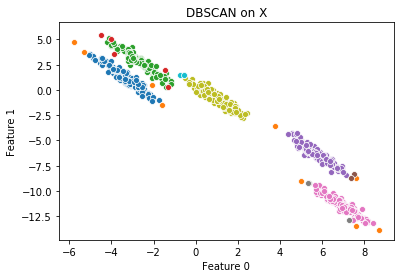

In [16]:
unique_labels = np.unique(labels)

for label in unique_labels:
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    sns.scatterplot(xy[:,0],xy[:,1])
    
    xy2 = X[class_member_mask & ~core_samples]
    sns.scatterplot(xy2[:,0],xy2[:,1])
plt.title("DBSCAN on X")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [17]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#stscaler = StandardScaler().fit(X)
#data = stscaler.transform(X)


In [18]:
#from sklearn.cluster import DBSCAN
#dbsc = DBSCAN(eps = 0.5, min_samples = 15).fit(X)
#labels = dbsc.labels_
#core_samples = np.zeros_like(labels, dtype = bool)
#core_samples[dbsc.core_sample_indices_] = True

#### Try a different DBSCAN:
#### DBSCAN Clustering with Hollow Bubble Plots

Text(0,0.5,'Feature 1')

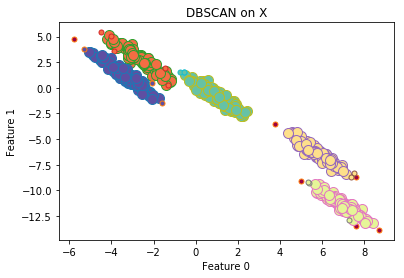

In [19]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on X")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Part 3

Which clustering method is better? k-means vs. dbscan     

I choose DBSCAN.   
This question really depends. According to the comparison between k-means clustering and DBSCAN, I found that there would be no outlier if I choose to use k-means clustering since all points will be assigned into the nearest cluster by calculating the Euclidean distance from each point to each cluster's centroid. However, DBSCAN can show me the outliers located outside of each cluster with a different color. K-means clustering method gives me 4 clusters according to the Elbow Method, which we tried to find the optimal marginal point from the graph. DBSCAN shows me 5 clusters, which is closer to my visualization by eyes intuitively. Although I can modify k-means by simply changing k value from 4 to 5, the result is still different from what I assume the graph should be at the beginning by using my eyes (Mentioned above). Changing k value will also waste time and computation resources. For me personally, I prefer the DBSCAN more than K-means since DBSCAN gives me a better and more straightforward visualization.

--------------------